
===== FINAL PyTorch NN Evaluation  =====
MAE  : 4.2249
MSE  : 29.7951
RMSE : 5.4585
R²   : 0.8213


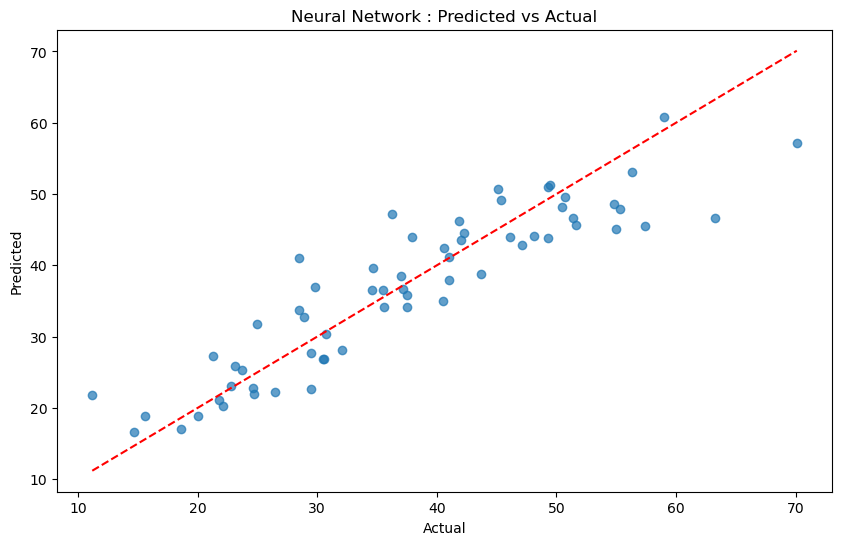

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ======================================================
# 1. Load Data
# ======================================================
X_train = pd.read_csv("X_train_corr_filtered.csv").values
y_train = pd.read_csv("y_train.csv").iloc[:, 0].values

X_test = pd.read_csv("X_test_corr_filtered.csv").values
y_test = pd.read_csv("y_test.csv").iloc[:, 0].values

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


# ======================================================
# 2. Neural Network Architecture (BEST PARAMS)
# ======================================================
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 180)
        self.fc2 = nn.Linear(180, 50)
        self.fc3 = nn.Linear(50, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.08395103944399458)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# ======================================================
# 3. Initialize Model
# ======================================================
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003649463423057799)

batch_size = 16
epochs = 80

# Dataloader
loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

# ======================================================
# 4. Training Loop
# ======================================================
model.train()
for epoch in range(epochs):
    for xb, yb in loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()

# ======================================================
# 5. Predict on TEST
# ======================================================
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy().flatten()

# ======================================================
# 6. Evaluation
# ======================================================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n===== FINAL PyTorch NN Evaluation  =====")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# ======================================================
# 7. Plot Predicted vs Actual
# ======================================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

min_v, max_v = min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))
plt.plot([min_v, max_v], [min_v, max_v], "r--")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network : Predicted vs Actual")
plt.show()
